# Percptron Lab

In [1]:
# import all our libraries here
%matplotlib inline 
import matplotlib.pyplot as plt # this library will be used for the scatter plot
import numpy as np 
import pandas as pd # to manage data frames and reading csv files


## Creating a Perceptron Classifier Class
The first step is to develop a function that can make predictions.
This will be needed both in the evaluation of candidate weights values in stochastic gradient descent, and after the model is finalized and we wish to start making predictions on test data or new data.
Below is a function named predict() that predicts an output value for an given instance using a set of weights.
The first weight is always the bias as it is standalone and not responsible for a specific input value.
Note: the best weights will be learnt iteratively with gradient descent through the train method


## Training Network Weights
We can estimate the weight values for our training data using stochastic gradient descent.

Stochastic gradient descent requires two parameters:

1. Learning Rate: Used to limit the amount each weight is corrected each time it is updated.
2. Epochs: The number of times to run through the training data while updating the weights.
These, along with the training data will be the arguments to the function.

There are 3 loops we need to perform in the function:

1. Loop over each epoch.
2. Loop over each data instance in the training data for an epoch.
3. Loop over each weight and update it for the training instance in an epoch.
As you can see, we update each weight for each instance in the training data, each epoch.

Weights are updated based on the error the model made. The error is calculated as the difference between the expected output value and the prediction made with the candidate weights.

There is one weight for each input attribute, and these are updated in a consistent way. Remember the bias usually needs to be multiplied with 1. 

w(t+1)= w(t) + learning_rate * (expected(t) - predicted(t)) * x(t)

In [2]:
class perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    lr : float
      Learning rate (between 0.0 and 1.0)
    input_size : int
      number of features in an instance.
    random_state : int
      Random number generator seed for random weight
      initialization.
    epochs : int
        Number of epochs for training the network towards achieving convergence

    Attributes
    -----------
    W : 1d-array
      Weights after fitting.
    E : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, input_size, lr=0.01, epochs=50, random_state=1):
               
        self.input_size = input_size
        self.epochs = epochs
        self.lr = lr
        self.E= []
        self.random_state = random_state
        
        rgen = np.random.RandomState(self.random_state) # use a random seed and draw from a normal dist centered on zero
        self.W = rgen.normal(loc=0.0, scale=0.01, size=self.input_size+1) #initialise weights and add one for bias
               
        self.E = []
        
    
    def net_input(self, x):
        z = self.W.T.dot(x) # dot product between input and the weights matrix 
        return z
    
    def activation(self, x):
        return 1 if x >= 0.0 else -1 #we have a binary classification
    
    def predict (self, x):
        #z = self.W.T.dot(x) # dot product between input and the weights matrix 
        z = self.net_input(x)
        a = self.activation(z)
        return a
    
    def train(self, X, t): # X is inputs t are the targets
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        t : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
               
        for _ in range(self.epochs):
            sum_error = 0.0
            for i in range(t.shape[0]): # go through each instance
                x = np.insert(X[i], 0, 1) #remember to insert 1 for the bias input
                y = self.predict(x)
                error = t[i] - y
                self.W = self.W + self.lr * error * x
                sum_error += error**2 #this is the sum of squared error accumilated over all of the train_set
            pass
            self.E.append(sum_error)
        pass


### Toy dataset to test AND gates


In [13]:
inputs = np.array([[0,0], [0,1], [1,0], [1,1]]) # this is an input example for an AND gate
print("Binary inputs to test an AND gate:", inputs)
targets = np.array([-1,-1,-1,1])
print("Outputs from the AND gate should be:", targets)
p = perceptron(input_size=len(inputs[0]), epochs=10)
p.train(inputs, targets)
print("The weights learnt ",  p.W) # these are the weights that would model an AND gate with a perceptron

Binary inputs to test an AND gate: [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Outputs from the AND gate should be: [-1 -1 -1  1]
The weights learnt  [-0.04375655  0.03388244  0.01471828]


# Exercise  - logic gates
- How would you test if the above weights learnt by the perceptron correctly model an AND gate? Hint: You can create an instance and use the perceptron to make a prediction p.predict(x). But remember to augment the instance with the extra bias feature.
- Can the perceptron be used for OR gates? If, yes, you should now try the above for the OR gate. Simply add a cell in the jupyter notebook (+ button) and type in your code and execute that cell. 
- Perceptron cannot model an XOR gate; can you think why this might be the case?


## Now lets try the perceptron on the SONAR Data Classification 

In this use case, you have been provided with a SONAR data set which contains the data about 208 patterns obtained by bouncing sonar signals off a metal cylinder (naval mine) and a rock at various angles and under various conditions. Now, as you know, a naval mine is a self-contained explosive device placed in water to damage or destroy surface ships or submarines. So, our goal is to build a model that can predict whether the object is a naval mine or rock based on our data set. 
<img src="comic.png">

Now, let us have a look at our SONAR data set:

<img src="sonar.png">


Here, the overall fundamental procedure will be same as that of AND gate with few difference which will be discussed to avoid any confusion. 

Lets first read in the sonar training data which is stored as a csv file. Once we create the perceptron model we can test its accuracy on a the disjoint test set. 
For convinieice I have converted the class label "R" into integer 1 and "M" into integer -1. You can explore the csv file in an excel spreadsheet. Note that class label is the last column.


## What does the Sonar data look like?

In [30]:
df = pd.read_csv('sonar-train.csv')
df.head() # show the first 5 rows
# note you can use tail to view the last 5 rows

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


## Sonar Data Exercise - Data View:
- You should try the tail() function on the sonar data
- another useful function is info(); again try this out and exploure the output (e.g. df.info()   )

In [29]:
# a more detailed view can be had with describe()
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,...,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,0.030938,0.040818,0.046593,0.060014,0.079951,0.104698,0.120184,0.134003,0.175025,0.201511,...,0.014174,0.011924,0.011928,0.010180,0.009159,0.008634,0.009120,0.008880,0.007023,-0.067568
std,0.025404,0.035896,0.042141,0.051835,0.060874,0.059890,0.063227,0.093016,0.131576,0.142962,...,0.010921,0.007387,0.007921,0.007756,0.006217,0.006119,0.007077,0.006607,0.005419,1.001103
min,0.001500,0.000600,0.001500,0.005800,0.007900,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001100,0.000600,0.000600,0.000700,0.000300,0.000200,0.000600,-1.000000
25%,0.013350,0.015150,0.019475,0.026975,0.038925,0.064600,0.077100,0.071600,0.083150,0.092150,...,0.007050,0.006150,0.005825,0.004475,0.004900,0.004100,0.004200,0.004800,0.003300,-1.000000
50%,0.022650,0.030850,0.033750,0.045400,0.064000,0.089650,0.105600,0.110050,0.143950,0.170000,...,0.011000,0.011600,0.010100,0.008250,0.007750,0.007250,0.007500,0.007300,0.005800,-1.000000
75%,0.037325,0.055700,0.062300,0.078550,0.112725,0.142900,0.155150,0.168600,0.224375,0.268350,...,0.017700,0.016075,0.015825,0.012950,0.012400,0.011325,0.012200,0.011200,0.009325,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.307000,0.332200,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


The Count, min and max rows are self-explanatory. std is standard deviation, which measures how dispersed the values are. The 25%, 50% and 75% rows show the corresponding percentiles:  apercentile indicates the value below which a given percentage of observations in a group of observations falls. For example , 25% of the instances have a V1 value lower than 0.013350 , while 50% are lower than 0.022650 and 75% are lower than 0.137100. These are often called 25th percentile (or 1st quartile), the median , and the 75th percentile (or 3rd quartile).


## Histograms of  Sonar data
We will try to visualise the data using a scatter plot
Note that we have 60 features in this data set so we need to choose 2 features for the x and y axis

<function matplotlib.pyplot.show>

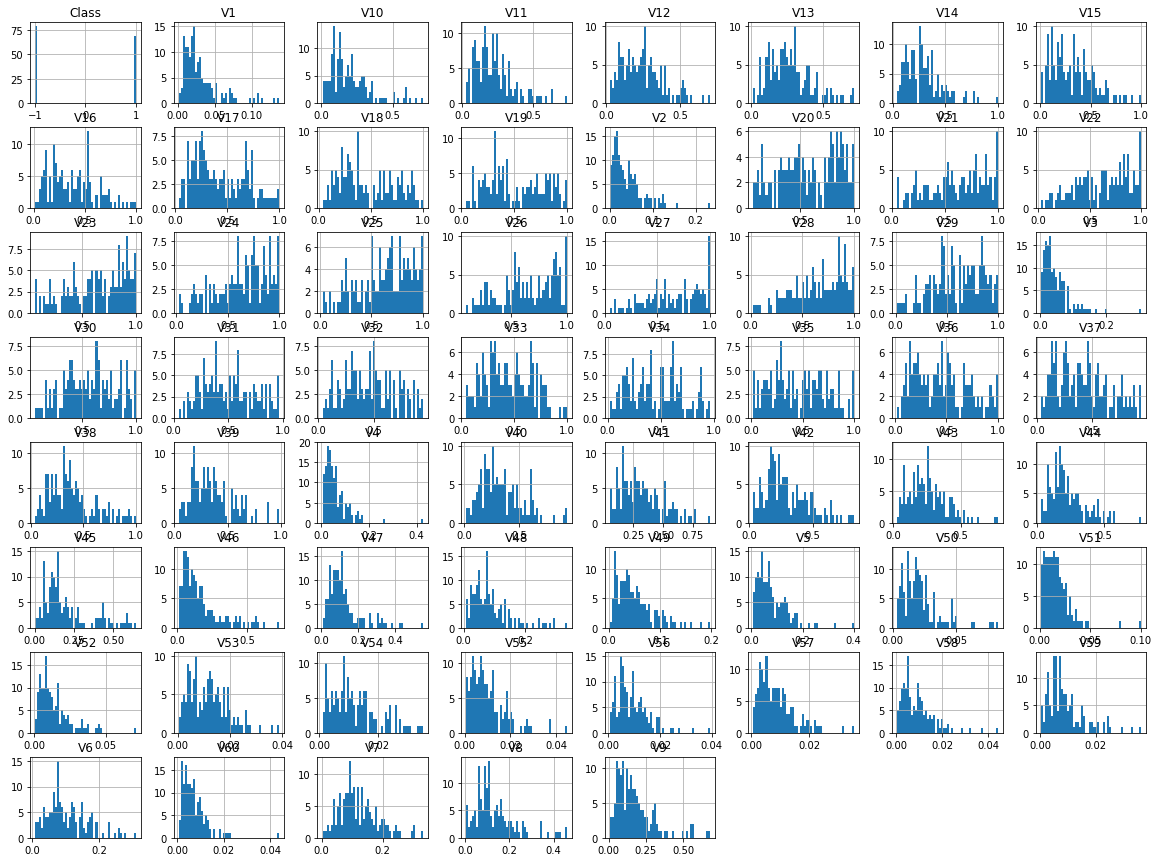

In [30]:
# exploring features
df. hist(bins=50, figsize=(20,15))
plt.show

## Create a Scatter plot of Sonar data

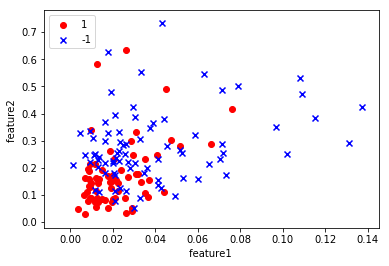

In [38]:
#get the class labels for each instance
y = df.iloc[0:, [-1]].values #get all the class values for each row; here -1 gets the last col which has class values
y = np.asfarray(y).flatten()
#print(y)
#X = df.iloc[0:, [0:59]] # get just the rows without the target or class values
#print(X)

count = np.where(y == 1, 1, 0).sum() # count the number of instances that belong to class 1
#we can use coount as an index as the instances are sorted by the class label
#so if we want to access class=1, then they appear first.
#print(count)

# extract 2 features using their index location
f1 = 0
f2 = 10

X = df.iloc[0:, [f1, f2]].values

# plot data
plt.scatter(X[:count, 0], X[:count, 1], color='red', marker='o', label='1')
plt.scatter(X[count:, 0], X[count:, 1], color='blue', marker='x', label='-1')

plt.xlabel('feature1 ')
plt.ylabel('feature2 ')
plt.legend(loc='upper left')

## plt.savefig('images/02_06.png', dpi=300)
plt.show()


## Sona Data  Exercise - Scatter Plots
You can try out the code above for different feature combinations. 
Through the scatter plots you will notice that this is a hard data set to linearly separate with just two features.

In [39]:
#Now lets the read the train and test csv files to create and test our model
train = pd.read_csv('sonar-train.csv')
test = pd.read_csv('sonar-test.csv')
train_data_list = train.iloc[0:].values
print(train_data_list.shape)
test_data_list = test.iloc[0:].values
print(test_data_list.shape)

(148, 61)
(60, 61)


## Train the perceptron on the SONAR dataset

In [40]:
targets = [] #empty list to hold the class labels
inputs = [] # empty list to hold the instances

#targets = np.zeros(rows) # initialise the 1-dimensional array which will hold the class values
#inputs = np.zeros(shape=(rows,cols)) # initialise the 2-dimensional matrix which has the set of train data


for instance in train_data_list:
    # split it by the commas
    #all_values = instance.split(',') 
    input = (np.asfarray(instance[:-1]) )
    target = (np.asfarray(instance[-1:]) ) # return all except the last element which is the target class label
       
    inputs.append(input) # append to the list of instances
    targets.append(int(target)) # append to the list of targets and make sure classes are integers
    pass

# we will convert our lists into numpy array so its compatible with our perceptron class
# for this we use asarray function for this
inputs = (np.asarray(inputs)) 
targets = (np.asarray(targets).flatten())
print(len(inputs), len(inputs[0]), len(targets))
    
# create a new instance of the perceptron class and train it to generate the set of weights
p = perceptron(input_size=len(inputs[0]), epochs=100, lr=0.0001)
print("weights learnt are:")
p.train(inputs, targets) # works well with lr =0.01 and higher epochs like 1000

#print(p.W)
print(p.E)


148 60 148
weights learnt are:
[120.0, 144.0, 144.0, 144.0, 128.0, 132.0, 128.0, 124.0, 124.0, 120.0, 112.0, 108.0, 104.0, 108.0, 104.0, 96.0, 100.0, 104.0, 100.0, 96.0, 96.0, 92.0, 96.0, 100.0, 100.0, 96.0, 92.0, 96.0, 92.0, 92.0, 96.0, 88.0, 84.0, 92.0, 88.0, 84.0, 80.0, 84.0, 76.0, 84.0, 80.0, 80.0, 76.0, 76.0, 72.0, 76.0, 80.0, 72.0, 76.0, 72.0, 68.0, 72.0, 68.0, 68.0, 72.0, 64.0, 64.0, 68.0, 60.0, 60.0, 64.0, 56.0, 60.0, 64.0, 56.0, 56.0, 56.0, 56.0, 60.0, 56.0, 56.0, 52.0, 52.0, 52.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 52.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 40.0]


## Plot the model error with increasing epochs

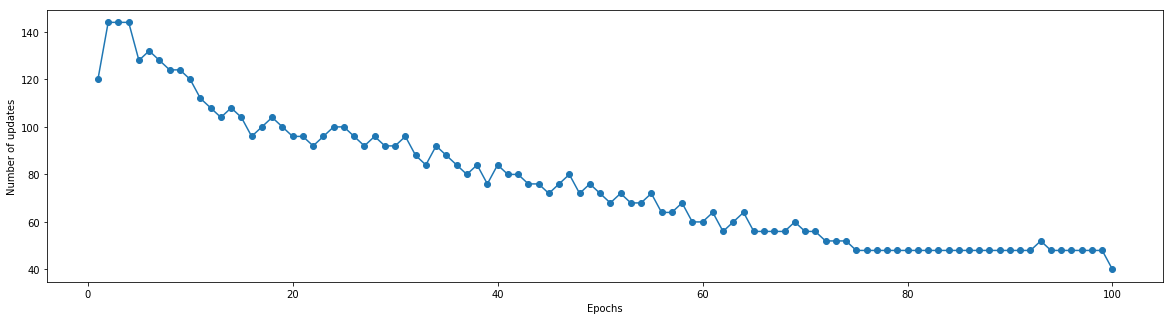

In [41]:
plt.figure(figsize=(20,5)) #width, height settings for figures
plt.plot(range(1, len(p.E) + 1), p.E, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

### Now lets Test the Perceptron on the SONAR test data
We will keep track of the predicted and actual outputs in order to calculate the accuracy of the perceptron on the unseen test data. 

In [42]:
#create an empty list called results to keep track of the network performance on each test instance
results = []
#print ("shape ", test_data_list.shape)
#print(all_values)

#go through all the test instances
for instance in test_data_list:
    #all_values = instance#.split(',')
    input = (np.asfarray(instance[:-1]) )# return all except the last element which is the target class label into a numpy array
    #print(len(input))
        
    target_label = np.asfarray(instance[-1:]) # get just the last element which is the target class into a numpy array
    #print("Correct label", int(target_label))
    
    #query the perceptron with the test input
    x = np.insert(input, 0, 1) #remember to add the bias value of 1 to the instance
    predict_label = p.predict(x)
    #print("Predicted class:", predict_label )
    
    #compute network error
    if (predict_label == target_label):
        results.append(1)
    else: 
        results.append(0)
        pass
    pass
        
#print network performance as an accuracy metric
results_array = np.asfarray(results)
print ("accuracy = ", results_array.sum() / results_array.size)

accuracy =  0.5666666666666667


## Compare different learning rates

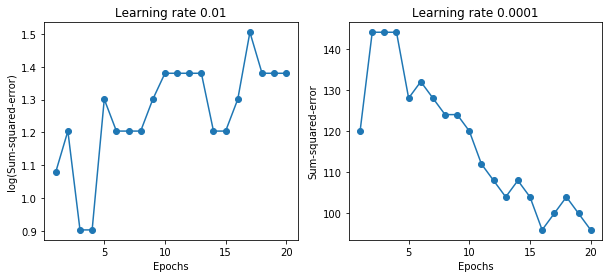

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

p1 = perceptron(input_size=len(inputs[0]), epochs=20, lr=0.1)
p1.train(inputs, targets)
ax[0].plot(range(1, len(p1.E) + 1), np.log10(p1.E), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Learning rate 0.01')

p2 = perceptron(input_size=len(inputs[0]), epochs=20, lr=0.0001)
p2.train(inputs, targets)
ax[1].plot(range(1, len(p2.E) + 1), p2.E, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

# Exercises - Perceptron hyperparameters
- Explore different learning rate values, and epochs. Do they make any improvement towards the final test accuracy?
- Try to identify another dataset from the Uni California Irvine (UCI) ML repository (ideally identify a binary dataset from http://mlr.cs.umass.edu/ml/datasets.html); which is where we obtained the Sonar dataset from. Explore how you might use the above code to apply the perceptron on that dataset.
How would you change the weight update steps to implement the Adaline weight update algorithm? Hint: Adaline uses the real values returned by the net_input method instead of the quantisation output returned from the activation method. 